# Digit Classification using MLP
This notebook demonstrates how to build a simple Multilayer Perceptron (MLP) for digit classification using the MNIST dataset.

In [1]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data: Normalize and one-hot encode labels
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9297 - loss: 0.2405 - val_accuracy: 0.9614 - val_loss: 0.1247
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9688 - loss: 0.1010 - val_accuracy: 0.9716 - val_loss: 0.0924
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9776 - loss: 0.0709 - val_accuracy: 0.9728 - val_loss: 0.0831
Epoch 4/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9831 - loss: 0.0530 - val_accuracy: 0.9726 - val_loss: 0.0887
Epoch 5/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9866 - loss: 0.0421 - val_accuracy: 0.9736 - val_loss: 0.0954
Epoch 6/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9890 - loss: 0.0343 - val_accuracy: 0.9738 - val_loss: 0.0938
Epoch 7/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9908 - loss: 0.0287 - val_accuracy: 0.9797 - val_loss: 0.0790
Epoch 8/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9915 - loss: 0.0239 - val_accuracy: 0.9789 - val_loss: 0.0738
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.97

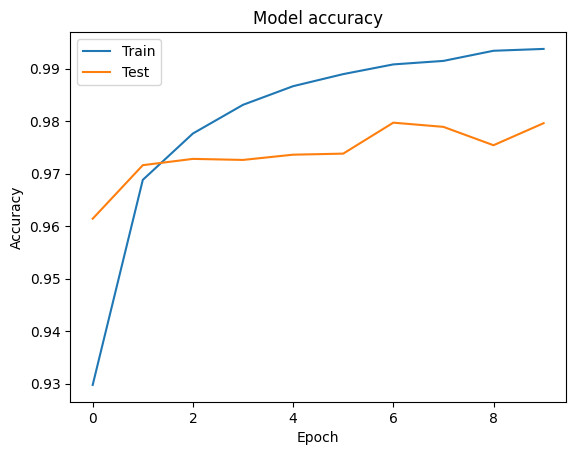

Test accuracy: 0.9796000123023987
Test loss: 0.0811389833688736


In [2]:

# Build the MLP model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


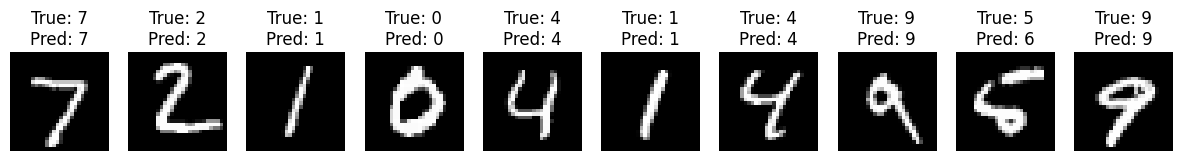

In [3]:
import matplotlib.pyplot as plt

# Get the predictions on the test set
predictions = model.predict(X_test)

# Function to plot images with their predicted and true labels
def plot_sample_images(X, y_true, y_pred, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X[i], cmap='gray')
        plt.title(f"True: {np.argmax(y_true[i])}\nPred: {np.argmax(y_pred[i])}")
        plt.axis('off')
    plt.show()

# Show 10 random test images with their true and predicted labels
plot_sample_images(X_test, y_test, predictions, n=10)


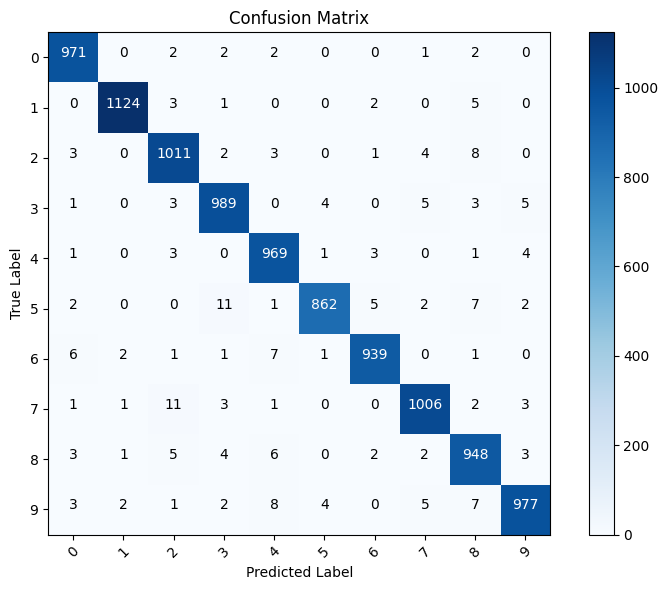

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the predicted class labels for the test set
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Function to plot the confusion matrix using matplotlib
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Loop over data dimensions and create text annotations.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max()/2. else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

# Class labels for digits 0-9
class_names = [str(i) for i in range(10)]

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_names)
plt.show()
